# SVM Model Testing

In [1]:
from PIL import Image, ImageOps
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv
import pandas as pd

from numpy.random import default_rng
rng = default_rng()

### Import dataset

In [2]:
images = []
labels = []
reshp = lambda image : cv.resize(image,(250,250))
for f in glob.iglob("/home/dmarq/school/CSE120/dataset/flat/good/*"):
    im = np.asarray(ImageOps.grayscale(Image.open(f)))
    for _ in range(1):
        M = np.random.rand(250,250)*20-10
        im = reshp(im) + M
        images.append(im)
        labels.append(1)
        
for f in glob.iglob("/home/dmarq/school/CSE120/dataset/flat/bad/*"):
    im = np.asarray(ImageOps.grayscale(Image.open(f)))
    for _ in range(1):         
        M = np.random.rand(250,250)*20-10
        im = reshp(im) + M
        images.append(im)
        labels.append(0)
    
images = np.array(images)
labels = np.array(labels)

In [3]:
print("{} images".format(len(images)))
print("Image shape {}".format(images.shape))

189 images
Image shape (189, 250, 250)


### Example Good and Bad Part

class 1


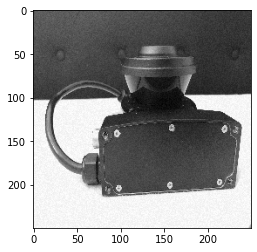

In [4]:
num = 0
plt.imshow(images[num],cmap='gray')
print("class {}".format(labels[num]))

class 0


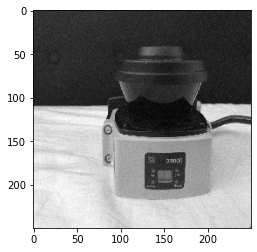

In [5]:
num = 172
plt.imshow(images[num],cmap='gray')
print("class {}".format(labels[num]))

## import model libraries

In [6]:
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.neighbors import NearestNeighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pickle

### training and testing split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.95)
print("Train shape {}".format(X_train.shape))
print("Test shape {}".format(X_test.shape))

Train shape (9, 250, 250)
Test shape (180, 250, 250)


### data pipeline

In [8]:
flatten = lambda batch : batch.reshape(batch.shape[0],-1)

In [9]:
pipe = Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=5)), ('svc', SVC())])

In [10]:
#pipe = Pipeline([('scaler', StandardScaler()),('svc', SGDClassifier( max_iter=10, tol=1e-3))])

In [11]:
pipe.fit(flatten(X_train),y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('svc', SVC())])

In [12]:
# load pipeline
#with open('model.pkl','rb') as file:
#    pipe = pickle.load(file)

In [13]:
# save pipeline
with open('model.pkl','wb') as file:
    pickle.dump(pipe,file)

In [14]:
# training set
pipe.score(flatten(X_train),y_train)

1.0

In [15]:
# testing set
pipe.score(flatten(X_test),y_test)

0.6166666666666667

Text(0.5, 15.0, 'prediction')

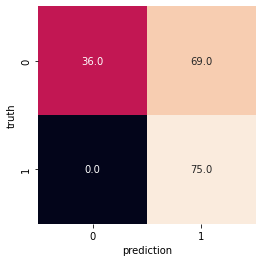

In [16]:
conf = np.zeros((2,2))
for i,im in enumerate(X_test):
    conf[y_test[i],pipe.predict([X_test[i].reshape(-1)])[0]] += 1
sns.heatmap(conf, annot=True, fmt="", cbar=False, square=True)
plt.ylabel('truth')
plt.xlabel('prediction')

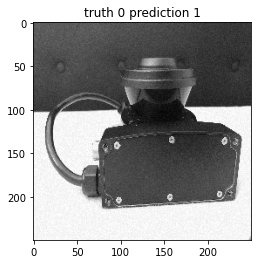

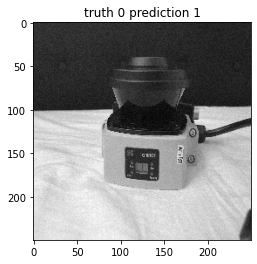

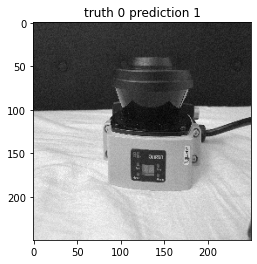

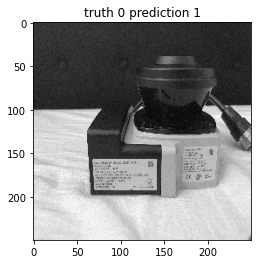

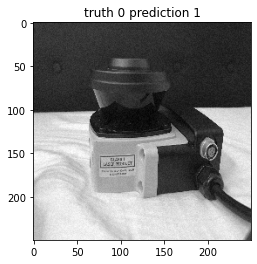

In [17]:
count = 0
for i, v in enumerate(pipe.predict(X_test.reshape(X_test.shape[0],-1))==y_test):
    if v==False and count < 5:
        count += 1
        plt.imshow(images[i],cmap='gray')
        plt.title("truth {} prediction {}".format(y_test[i],pipe.predict([X_test[i].reshape(-1)])[0]))
        plt.show()

### inverse transform visualization

In [18]:
test1 = X_train[2:3]
test2 = pipe[0].inverse_transform(pipe[1].inverse_transform(pipe[1].transform(pipe[0].transform(X_train[0:1].reshape(1,-1))))).reshape(1,250,250)

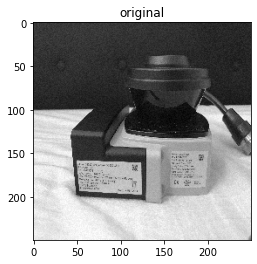

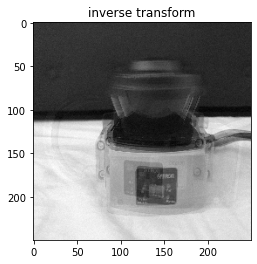

In [19]:
plt.imshow(test1[0],cmap='gray')
plt.title('original')
plt.show()
plt.imshow(test2[0],cmap='gray')
plt.title('inverse transform')
plt.show()

### Accuracy vs. Number of Principal Components

In [20]:
for i in range(10,101,10):
    p = Pipeline([('scaler', StandardScaler()),('pca', PCA(n_components=i,svd_solver="full")), ('svc', SVC())])
    p.fit(X_train.reshape(X_train.shape[0],-1),y_train)
    plt.scatter(x=p[1].components_.shape[0],y=p.score(X_test.reshape(X_test.shape[0],-1),y_test),color='blue')
plt.xlabel('number of principal components')
plt.ylabel('accuracy')
plt.show()

ValueError: n_components=10 must be between 0 and min(n_samples, n_features)=9 with svd_solver='full'

In [ ]:
# example of pipeline useage for API

In [ ]:
import Pipeline as p

In [ ]:
clf = p.Pipeline()

In [ ]:
clf.classify(X_test[0:10])

In [ ]:
y_test[0:10]